In [1]:
%matplotlib inline

import pylab as pl
import enaml
import numpy as np

with enaml.imports():
    from psi.token import primitives
    from psi.controller.calibration import InterpCalibration
    from psi.controller.queue import FIFOSignalQueue
    
calibration = InterpCalibration.as_attenuation()

In [2]:
fs = 20000
t = np.arange(fs)/fs
generator = primitives.chirp_factory(fs, 5, 50, 1, 0, calibration)
y, c = primitives.generate_waveform(generator, samples=fs)

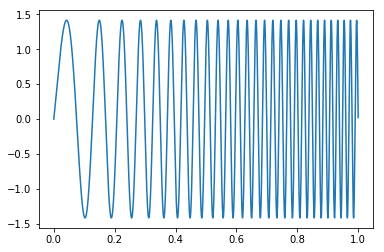

In [3]:
pl.plot(t, y)

TODO:

- Explain why we must create a factory function rather than using the generator directly (answer is that the generator cannot be restarted, so we need the ability to recreate the generator using the same arguments).


False


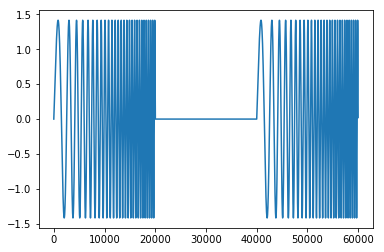

In [6]:
queue = FIFOSignalQueue(fs)

factory = lambda: primitives.chirp_factory(fs, 5, 50, 1, 0, calibration)
queue.append(factory, trials=5, delays=1)

y, complete = queue.pop_buffer(fs*3)
print(complete)
pl.plot(y)